In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

import joblib


In [48]:
df=pd.read_csv('data.csv')

In [49]:
print(df.columns)

Index(['asdf_id', 'udel_precip_v501_sum.1900.max',
       'udel_precip_v501_sum.1900.mean', 'udel_precip_v501_sum.1900.min',
       'udel_precip_v501_sum.1900.sum', 'udel_precip_v501_sum.1901.max',
       'udel_precip_v501_sum.1901.mean', 'udel_precip_v501_sum.1901.min',
       'udel_precip_v501_sum.1901.sum', 'udel_precip_v501_sum.1902.max',
       ...
       'Level', 'OBJECTID', 'Shape_Area', 'Shape_Length', 'gqid', 'id',
       'shapeGroup', 'shapeID', 'shapeName', 'shapeType'],
      dtype='object', length=14712)


In [50]:
print(df.describe())

          asdf_id  udel_precip_v501_sum.1900.max  \
count  735.000000                     731.000000   
mean   367.000000                    1674.061970   
std    212.320512                    1181.533295   
min      0.000000                     320.600000   
25%    183.500000                     963.400000   
50%    367.000000                    1394.000000   
75%    550.500000                    1940.100000   
max    734.000000                   11389.300000   

       udel_precip_v501_sum.1900.mean  udel_precip_v501_sum.1900.min  \
count                      731.000000                     731.000000   
mean                      1349.820865                    1077.470041   
std                        839.619154                     599.346487   
min                        219.167326                      71.800000   
25%                        791.701279                     652.850000   
50%                       1165.510224                     972.200000   
75%                       1

In [51]:
rainfall_cols = [col for col in df.columns if '.sum' in col]
rainfall_df = df[rainfall_cols]
print(rainfall_df)

     udel_precip_v501_sum.1900.sum  udel_precip_v501_sum.1901.sum  \
0                      1746.197027                    1589.226027   
1                      3856.902955                    3772.806962   
2                      5397.429014                    5695.707017   
3                      4540.424012                    3853.350010   
4                      3223.308988                    3215.012991   
..                             ...                            ...   
730                     421.520006                     756.120011   
731                    1011.860991                    1178.431988   
732                     466.539994                     434.495994   
733                    1021.776986                    1243.161985   
734                     901.607004                    1021.356004   

     udel_precip_v501_sum.1902.sum  udel_precip_v501_sum.1903.sum  \
0                      1669.170025                    1545.890024   
1                      3076.45796

In [52]:
df.isnull().sum()
missing_percent = (df.isnull().sum() / len(df)) * 100
print(missing_percent.sort_values(ascending=False))



ltdr_avhrr_ndvi_v5_monthly.202011.max      100.0
ltdr_avhrr_ndvi_v5_monthly.202011.min      100.0
ltdr_avhrr_ndvi_v5_monthly.199410.min      100.0
ltdr_avhrr_ndvi_v5_monthly.199412.max      100.0
ltdr_avhrr_ndvi_v5_monthly.199412.mean     100.0
                                           ...  
cru_ts_405_tmp_monthly_mean.201604.min       0.0
cru_ts_405_tmp_monthly_mean.201605.max       0.0
cru_ts_405_tmp_monthly_mean.201605.mean      0.0
cru_ts_405_tmp_monthly_mean.201605.min       0.0
shapeType                                    0.0
Length: 14712, dtype: float64


In [53]:
# STEP 1: Select relevant columns
id_cols = ['district_id'] if 'district_id' in df.columns else ['asdf_id']
rainfall_sum_cols = [col for col in df.columns if 'udel_precip_v501_sum' in col and '.sum' in col]
rainfall_max_cols = [col for col in df.columns if 'udel_precip_v501_sum' in col and '.max' in col]
rainfall_min_cols = [col for col in df.columns if 'udel_precip_v501_sum' in col and '.min' in col]
ntl_cols = [col for col in df.columns if 'viirs_ntl_annual' in col and '.sum' in col]

# STEP 2: Create cleaned DataFrame
relevant_cols = id_cols + rainfall_sum_cols + rainfall_max_cols + rainfall_min_cols + ntl_cols
df_clean = df[relevant_cols].copy()

# STEP 3: Drop rows with missing values
df_clean.dropna(inplace=True)

# STEP 4: Reset index
df_clean.reset_index(drop=True, inplace=True)

# STEP 5: Check final result
print(df_clean.shape)

print(df_clean.describe())


(730, 364)
          asdf_id  udel_precip_v501_sum.1900.sum  \
count  730.000000                     730.000000   
mean   367.016438                    1763.212775   
std    212.865710                    1437.230045   
min      0.000000                       5.298000   
25%    182.250000                     853.108267   
50%    366.500000                    1373.105027   
75%    551.750000                    2263.898035   
max    734.000000                   12792.378870   

       udel_precip_v501_sum.1901.sum  udel_precip_v501_sum.1902.sum  \
count                     730.000000                     730.000000   
mean                     1634.813550                    1669.372231   
std                      1411.493814                    1374.401496   
min                         4.301000                       6.211000   
25%                       689.978759                     778.704248   
50%                      1228.125011                    1334.340505   
75%                    

In [54]:
df_clean.head()

,asdf_id,udel_precip_v501_sum.1900.sum,udel_precip_v501_sum.1901.sum,udel_precip_v501_sum.1902.sum,udel_precip_v501_sum.1903.sum,udel_precip_v501_sum.1904.sum,udel_precip_v501_sum.1905.sum,udel_precip_v501_sum.1906.sum,udel_precip_v501_sum.1907.sum,udel_precip_v501_sum.1908.sum,...,udel_precip_v501_sum.2017.min,viirs_ntl_annual_v20_cf_cvg.2018.sum,viirs_ntl_annual_v20_cf_cvg.2020.sum,viirs_ntl_annual_v20_cf_cvg.2017.sum,viirs_ntl_annual_v20_cf_cvg.2013.sum,viirs_ntl_annual_v20_cf_cvg.2019.sum,viirs_ntl_annual_v20_cf_cvg.2016.sum,viirs_ntl_annual_v20_cf_cvg.2012.sum,viirs_ntl_annual_v20_cf_cvg.2015.sum,viirs_ntl_annual_v20_cf_cvg.2014.sum
0,0,1746.197027,1589.226027,1669.170025,1545.890024,1898.988030,1032.992016,1825.752030,1272.178020,1677.868026,...,414.9,24287.910156,24287.910156,24287.910156,24287.910156,24287.910156,24287.910156,24287.910156,24287.910156,24287.910156
1,1,3856.902955,3772.806962,3076.457964,3767.658958,2731.828971,2933.621968,3264.712966,2941.286968,3695.390959,...,931.7,43130.368912,43130.368912,43130.368912,43130.368912,43130.368912,43130.368912,43130.368912,43130.368912,43130.368912
2,2,5397.429014,5695.707017,3603.031008,5725.852015,3748.222014,5610.012014,5974.209000,4058.621999,5322.234014,...,917.7,59509.051392,59509.051392,59509.051392,59509.051392,59509.051392,59509.051392,59509.051392,59509.051392,59509.051392
3,3,4540.424012,3853.350010,2954.436007,4172.623006,2446.859006,4104.907013,4385.198013,3223.457008,3609.610010,...,767.9,50411.950012,50411.950012,50411.950012,50411.950012,50411.950012,50411.950012,50411.950012,50411.950012,50411.950012
4,4,3223.308988,3215.012991,2244.900991,3040.748990,1997.566993,3082.792989,2775.988991,2446.914989,2607.395993,...,1085.4,33805.869141,33805.869141,33805.869141,33805.869141,33805.869141,33805.869141,33805.869141,33805.869141,33805.869141


In [55]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Columns: 364 entries, asdf_id to viirs_ntl_annual_v20_cf_cvg.2014.sum
dtypes: float64(363), int64(1)
memory usage: 2.0 MB


In [56]:
df_clean.describe()


,asdf_id,udel_precip_v501_sum.1900.sum,udel_precip_v501_sum.1901.sum,udel_precip_v501_sum.1902.sum,udel_precip_v501_sum.1903.sum,udel_precip_v501_sum.1904.sum,udel_precip_v501_sum.1905.sum,udel_precip_v501_sum.1906.sum,udel_precip_v501_sum.1907.sum,udel_precip_v501_sum.1908.sum,...,udel_precip_v501_sum.2017.min,viirs_ntl_annual_v20_cf_cvg.2018.sum,viirs_ntl_annual_v20_cf_cvg.2020.sum,viirs_ntl_annual_v20_cf_cvg.2017.sum,viirs_ntl_annual_v20_cf_cvg.2013.sum,viirs_ntl_annual_v20_cf_cvg.2019.sum,viirs_ntl_annual_v20_cf_cvg.2016.sum,viirs_ntl_annual_v20_cf_cvg.2012.sum,viirs_ntl_annual_v20_cf_cvg.2015.sum,viirs_ntl_annual_v20_cf_cvg.2014.sum
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,...,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,367.016438,1763.212775,1634.813550,1669.372231,1856.621968,1642.852854,1566.600734,1810.931171,1656.377330,1732.007379,...,1102.269041,22920.134718,22920.498130,22920.102143,22920.306349,22920.185270,22920.231820,22920.496980,22920.237088,22920.446610
std,212.865710,1437.230045,1411.493814,1374.401496,1509.916349,1340.401983,1348.566177,1411.414367,1408.644692,1491.866410,...,703.710791,30821.496573,30824.289234,30819.674170,30821.371107,30822.268810,30821.608955,30824.289249,30821.782852,30823.622283
min,0.000000,5.298000,4.301000,6.211000,3.422000,6.142000,3.965000,7.889000,3.747000,7.911000,...,52.300000,141.509995,141.509995,141.509995,141.509995,141.509995,141.509995,141.509995,141.509995,141.509995
25%,182.250000,853.108267,689.978759,778.704248,861.740995,745.780484,690.774498,909.603744,747.486733,758.771496,...,624.800000,10563.929687,10563.929687,10563.929687,10563.929687,10563.929687,10563.929687,10563.929687,10563.929687,10563.929687
50%,366.500000,1373.105027,1228.125011,1334.340505,1454.301013,1286.451024,1210.486003,1430.610989,1259.547022,1314.718488,...,890.150000,16836.379883,16836.379883,16836.379883,16836.379883,16836.379883,16836.379883,16836.379883,16836.379883,16836.379883
75%,551.750000,2263.898035,2119.253041,2164.798460,2339.969510,2127.190017,2067.497214,2206.783211,2143.867773,2283.798256,...,1339.100000,26504.402733,26504.402733,26504.402733,26504.402733,26504.402733,26504.402733,26504.402733,26504.402733,26504.402733
max,734.000000,12792.378870,10837.567894,10445.963914,12632.270883,10756.597889,14386.994866,11619.651883,11949.268882,13792.661874,...,4130.600000,491217.483154,491346.483154,491127.483154,491206.483154,491254.483154,491219.483154,491346.483154,491227.483154,491314.483154


In [57]:
#rows and column
df_clean.shape

(730, 364)

In [58]:
df.columns

Index(['asdf_id', 'udel_precip_v501_sum.1900.max',
       'udel_precip_v501_sum.1900.mean', 'udel_precip_v501_sum.1900.min',
       'udel_precip_v501_sum.1900.sum', 'udel_precip_v501_sum.1901.max',
       'udel_precip_v501_sum.1901.mean', 'udel_precip_v501_sum.1901.min',
       'udel_precip_v501_sum.1901.sum', 'udel_precip_v501_sum.1902.max',
       ...
       'Level', 'OBJECTID', 'Shape_Area', 'Shape_Length', 'gqid', 'id',
       'shapeGroup', 'shapeID', 'shapeName', 'shapeType'],
      dtype='object', length=14712)

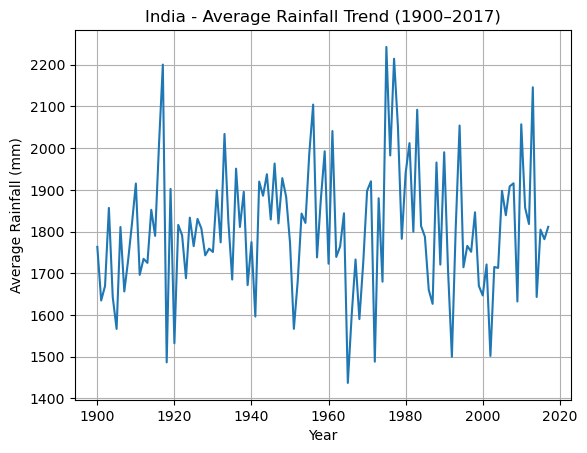

In [59]:
# Calculate average rainfall for each year across all districts
rainfall_avg = df_clean[rainfall_sum_cols].mean()

# Extract year from column names (e.g., 'udel_precip_v501_sum.1900.sum' → 1900)
years = [int(col.split('.')[-2]) for col in rainfall_sum_cols]

# Plot average rainfall vs years
plt.plot(years, rainfall_avg)
plt.xlabel("Year")  # X-axis label
plt.ylabel("Average Rainfall (mm)")  # Y-axis label
plt.title("India - Average Rainfall Trend (1900–2017)")  # Title of the graph
plt.grid(True)  # Show grid on plot for better readability
plt.show()  # Display the plot


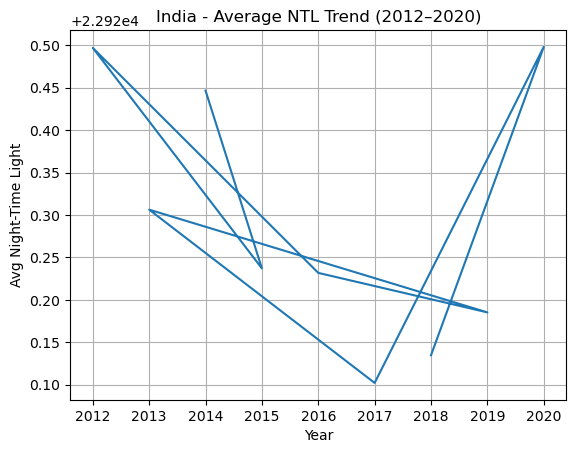

In [60]:
ntl_avg = df_clean[ntl_cols].mean()
ntl_years = [int(col.split('.')[-2]) for col in ntl_cols]

plt.plot(ntl_years, ntl_avg)
plt.xlabel("Year")
plt.ylabel("Avg Night-Time Light")
plt.title("India - Average NTL Trend (2012–2020)")
plt.grid(True)
plt.show()


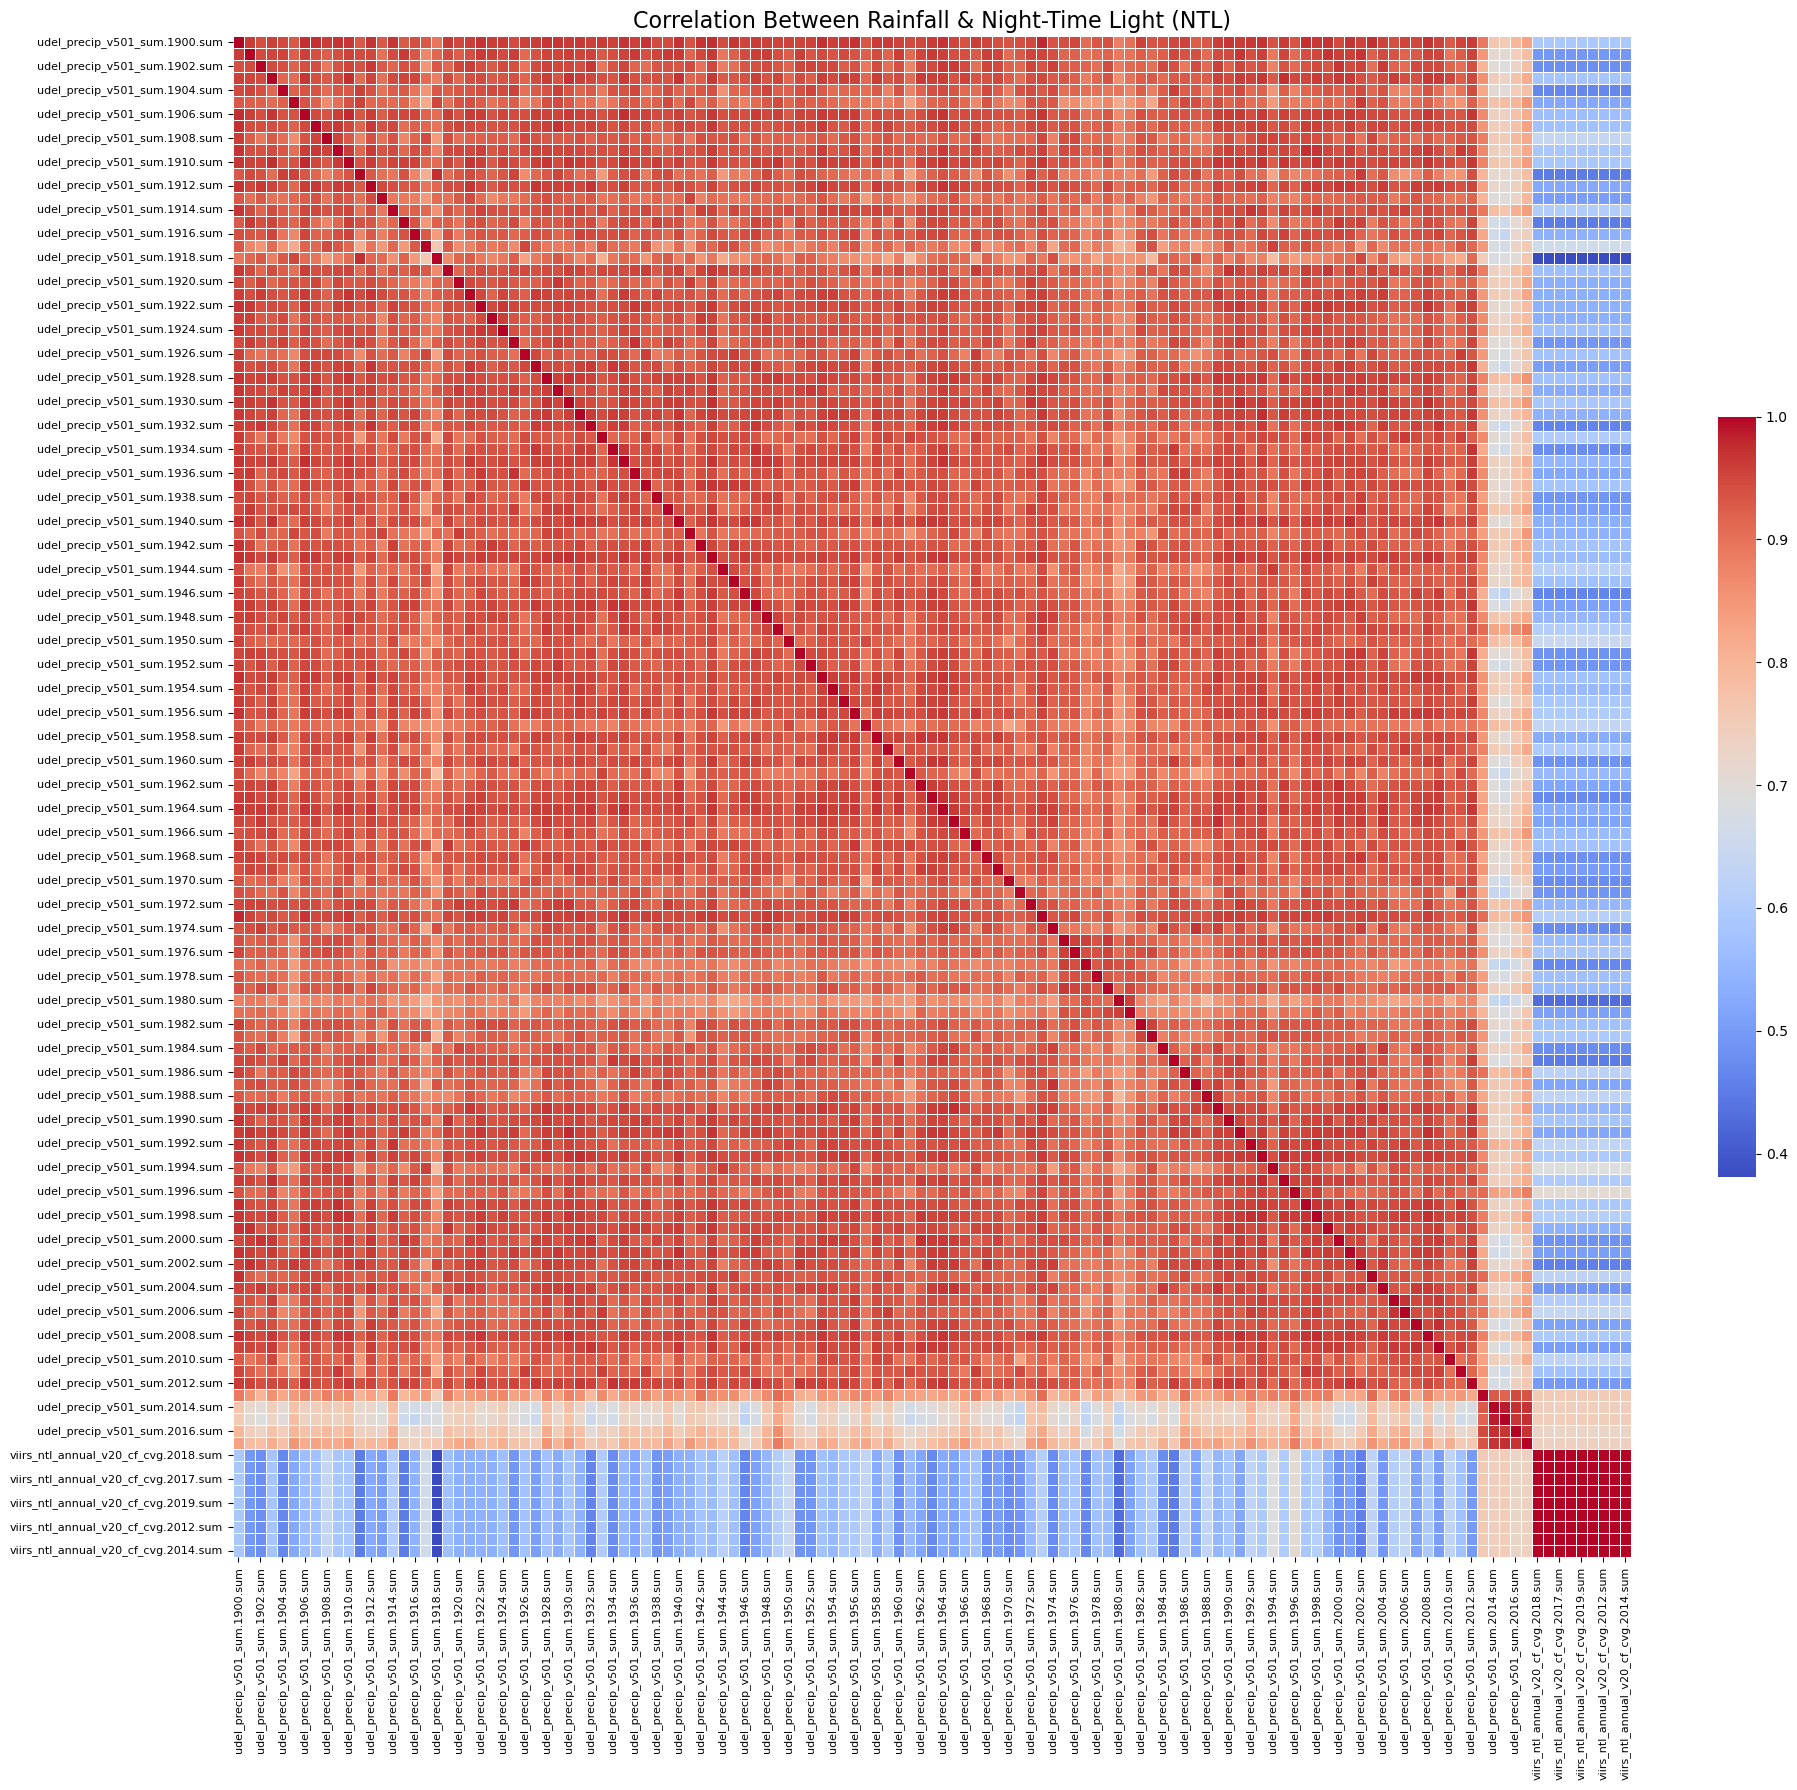

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

# Combine rainfall & NTL data
corr_df = df_clean[rainfall_sum_cols + ntl_cols]

# Calculate correlation matrix
corr_matrix = corr_df.corr()

# Set figure size bigger for clarity
plt.figure(figsize=(20, 18))  # 🔁 Bigger size

# Create heatmap with better settings
sns.heatmap(
    corr_matrix,
    cmap='coolwarm',           # 🔁 Better colors
    annot=False,               # 🔁 Set to True if you want values inside boxes
    fmt=".2f",                 # 🔁 Format for values
    linewidths=0.5,            # 🔁 Line between boxes
    cbar_kws={'shrink': 0.5},  # 🔁 Smaller colorbar
)

# Add title
plt.title("Correlation Between Rainfall & Night-Time Light (NTL)", fontsize=16)

# Rotate x and y labels for better readability
plt.xticks(rotation=90, fontsize=8)
plt.yticks(rotation=0, fontsize=8)

# Show plot
plt.tight_layout()
plt.show()


In [62]:
# Step 1: Normalize rainfall (average of 1900–1909)
df_clean['avg_rainfall'] = df_clean[rainfall_sum_cols].mean(axis=1)
df_clean['avg_ntl'] = df_clean[ntl_cols].mean(axis=1)

# Step 2: Min-Max Normalize
df_clean['rain_norm'] = (df_clean['avg_rainfall'] - df_clean['avg_rainfall'].min()) / (df_clean['avg_rainfall'].max() - df_clean['avg_rainfall'].min())
df_clean['ntl_norm'] = (df_clean['avg_ntl'] - df_clean['avg_ntl'].min()) / (df_clean['avg_ntl'].max() - df_clean['avg_ntl'].min())

# Step 3: Risk = Low Rain + Low NTL → High Risk
df_clean['risk_score'] = (1 - df_clean['rain_norm']) + (1 - df_clean['ntl_norm'])

# Step 4: Top 10 high-risk districts
df_clean_sorted = df_clean.sort_values('risk_score', ascending=False)
print(df_clean_sorted[['asdf_id', 'avg_rainfall', 'avg_ntl', 'risk_score']].head(15))



     asdf_id  avg_rainfall     avg_ntl  risk_score
707      712      6.583635  141.509995    2.000000
704      709     13.167271  206.470001    1.999379
699      704     13.167271  350.820007    1.999085
86        86     21.593542  245.720001    1.998674
706      711     19.750906  400.589996    1.998496
265      266     23.309440  285.850006    1.998465
705      710     26.334542  560.450012    1.997682
697      702     24.543423  843.530029    1.997238
266      267     37.876830  381.979980    1.997189
217      217     34.478270  618.799988    1.996959
701      706     38.606255  712.899963    1.996461
376      379     49.028618  462.139984    1.996198
85        85     53.505482  462.230011    1.995866
702      707     45.600492  803.219971    1.995758
698      703     46.085449  908.799988    1.995507


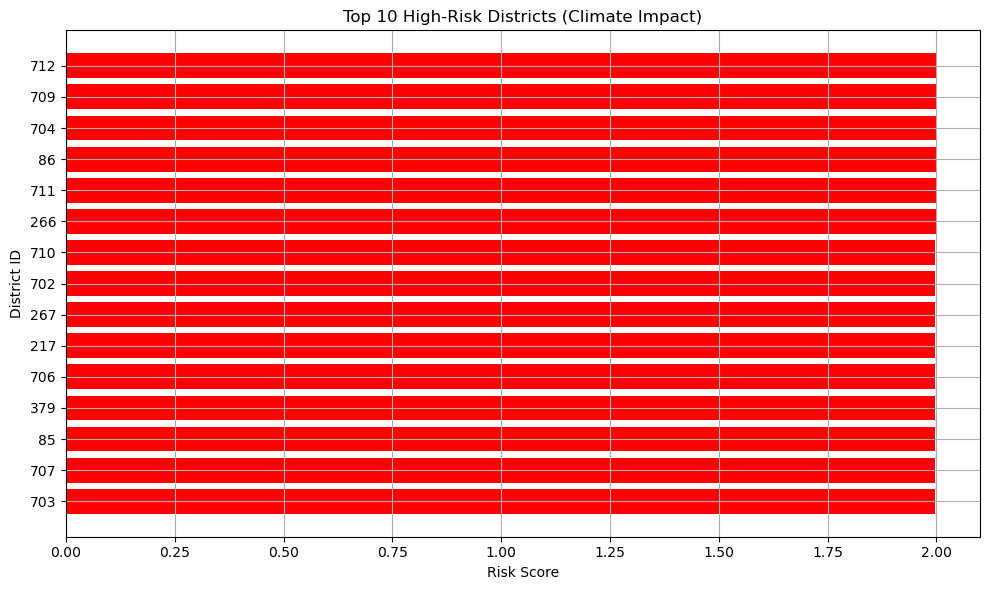

In [63]:
import matplotlib.pyplot as plt

top10 = df_clean_sorted.head(15)

plt.figure(figsize=(10, 6))
plt.barh(top10['asdf_id'].astype(str), top10['risk_score'], color='red')
plt.xlabel("Risk Score")
plt.ylabel("District ID")
plt.title("Top 10 High-Risk Districts (Climate Impact)")
plt.gca().invert_yaxis()
plt.grid(True)
plt.tight_layout()
plt.show()


In [64]:
# Suppose X = features (rain_norm + ntl_norm), y = target (risk_score)
X = df_clean[['rain_norm', 'ntl_norm']] #Sare features/inputs
y = df_clean['risk_score'] #Target value = what we want to predict

# 80% training, 20% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
# STEP 4: Create and train the model

model = LinearRegression()         # Linear regression model banaya
model.fit(x_train, y_train)        # Model ko training dacta se sikhaya


LinearRegression()

In [66]:
y_pred = model.predict(x_test)

In [86]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)#mse: Kitna farak hai actual aur predicted risk score mein
print("R² Score (Accuracy):", r2)#r2: Model ki accuracy (0 to 1, jitna zyada utna better)

Mean Squared Error: 1.6783556074265534e-31
R² Score (Accuracy): 1.0


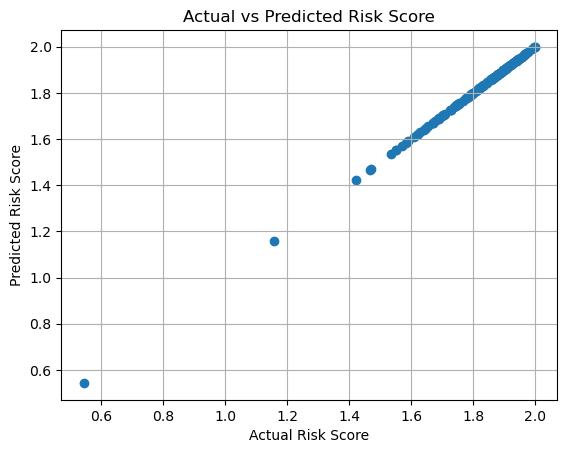

In [88]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Risk Score")
plt.ylabel("Predicted Risk Score")
plt.title("Actual vs Predicted Risk Score")
plt.grid(True)
plt.show()

In [90]:
joblib.dump(model, 'risk_model.pkl')   # Save trained model


['risk_model.pkl']